<a href="https://colab.research.google.com/github/ziedjouini/machine-learning/blob/main/Regression_House_sales_Valerie_Nevo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import datetime

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv"

df = pd.read_csv(link)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21609 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.160900e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401174e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671546e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


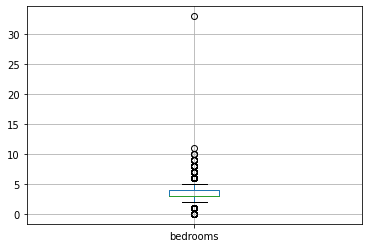

In [ ]:
df.boxplot(column=['bedrooms'])

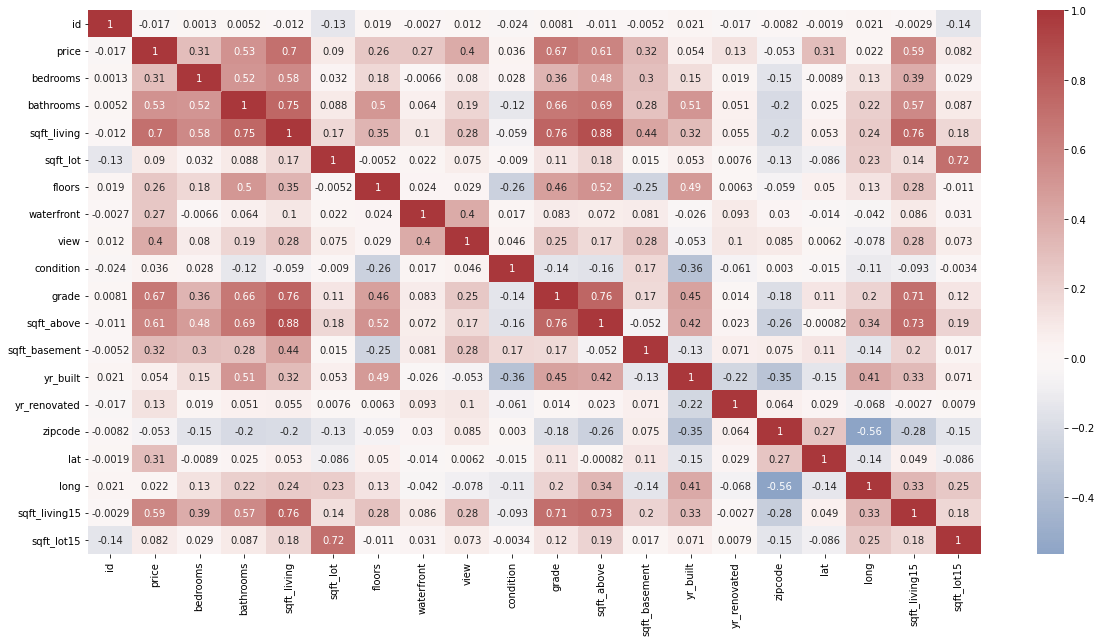

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, cmap = sns.color_palette("vlag", as_cmap=True), center = 0)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


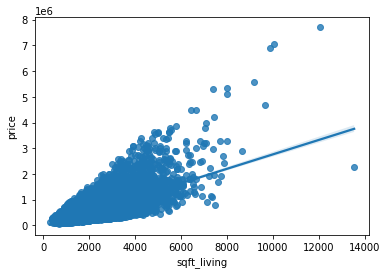

In [ ]:
sns.regplot('sqft_living', 'price', data = df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


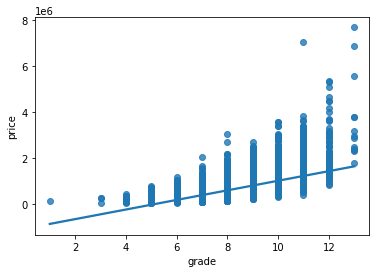

In [ ]:
sns.regplot('grade', 'price', data = df)
plt.show()

In [ ]:
df_clean = df.loc[df['price'] >= 0]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21609 non-null  int64         
 1   date           21609 non-null  datetime64[ns]
 2   price          21609 non-null  float64       
 3   bedrooms       21609 non-null  int64         
 4   bathrooms      21609 non-null  float64       
 5   sqft_living    21609 non-null  int64         
 6   sqft_lot       21609 non-null  int64         
 7   floors         21609 non-null  float64       
 8   waterfront     21609 non-null  int64         
 9   view           21609 non-null  int64         
 10  condition      21609 non-null  int64         
 11  grade          21609 non-null  int64         
 12  sqft_above     21609 non-null  int64         
 13  sqft_basement  21609 non-null  int64         
 14  yr_built       21609 non-null  int64         
 15  yr_renovated   2160

In [ ]:
def flag(info):
  m = ''
  if info >= 0:
    m = "real_value" 
  else:
    m = "predicted_value"
  return m

flag(7)

'real_value'

In [ ]:
df_clean['flag'] = df_clean['price'].apply(flag)
df_clean.head()

<ipython-input-104-53f212d97752>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['flag'] = df_clean['price'].apply(flag)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,flag
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,real_value
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,real_value
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,real_value
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,real_value
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,real_value


In [ ]:
df_nan = df.loc[df['price'].isna()]
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 21609 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             4 non-null      int64         
 1   date           4 non-null      datetime64[ns]
 2   price          0 non-null      float64       
 3   bedrooms       4 non-null      int64         
 4   bathrooms      4 non-null      float64       
 5   sqft_living    4 non-null      int64         
 6   sqft_lot       4 non-null      int64         
 7   floors         4 non-null      float64       
 8   waterfront     4 non-null      int64         
 9   view           4 non-null      int64         
 10  condition      4 non-null      int64         
 11  grade          4 non-null      int64         
 12  sqft_above     4 non-null      int64         
 13  sqft_basement  4 non-null      int64         
 14  yr_built       4 non-null      int64         
 15  yr_renovated   4 no

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
X = df_clean[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated',
       'lat', 'long','sqft_living15', 'sqft_lot15']]
y = df_clean['price']

model = LinearRegression().fit(X, y)

In [ ]:
model.score(X, y)

0.6704385278859799

In [ ]:
print("coefficient :",model.coef_)
print("interception :",model.intercept_)

coefficient : [-2.71580634e+04  2.28772771e+03  1.25404319e+02  1.92896822e-01
 -3.73096465e+04  5.82825623e+05  5.82455636e+04  7.81493783e+04
  7.57147555e+01  4.96895632e+01  5.43344293e+01  6.35891325e+05
 -2.63862391e+05  2.72708221e+01 -4.04244512e-01]
interception : -62891784.29551825


In [ ]:
for i, j in zip (X.columns, model.coef_):
  print(i,j)

bedrooms -27158.063439838752
bathrooms 2287.7277117436397
sqft_living 125.4043187036466
sqft_lot 0.19289682226872173
floors -37309.646461692406
waterfront 582825.6231145898
view 58245.563583954914
grade 78149.37831520397
sqft_above 75.71475553201992
sqft_basement 49.68956321993335
yr_renovated 54.334429344949555
lat 635891.3250226498
long -263862.3910328902
sqft_living15 27.270822060691785
sqft_lot15 -0.4042445116488125


In [ ]:
X1 = df_clean[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long','sqft_living15']]
y1 = df_clean['price']

model1 = LinearRegression().fit(X1, y1)

In [ ]:
model1.score(X1, y1)

0.6993699943607701

In [ ]:
from sklearn.model_selection import train_test_split

X2 = df_clean[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long','sqft_living15']]
y2 = df_clean['price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42, train_size = 0.75)
print("The length of the initial dataset is :", len(X2))
print("The length of the train dataset is   :", len(X2_train))
print("The length of the test dataset is    :", len(X2_test))

newmodel = LinearRegression().fit(X2_train, y2_train)

print("\nScore for the Train dataset :", newmodel.score(X2_train, y2_train))
print("Score for the Test dataset :", newmodel.score(X2_test, y2_test))

The length of the initial dataset is : 21609
The length of the train dataset is   : 16206
The length of the test dataset is    : 5403

Score for the Train dataset : 0.7008638416149059
Score for the Test dataset : 0.6940169168677166


In [ ]:
df_nan['price'] = newmodel.predict(df_nan[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long','sqft_living15']])
df_nan.head()

<ipython-input-114-44114d7bfcad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['price'] = newmodel.predict(df_nan[['bedrooms', 'bathrooms', 'sqft_living',


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21609,6600060120,2015-02-23,437017.356564,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,151604.643055,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,386518.534240,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,153987.391463,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
def flag(info):
  m = ''
  if info >= 0:
    m = "predicted_value"
  else:
    m = "real_value"
  return m

flag(7)

'predicted_value'

In [ ]:
df_nan['flag']= df_nan['price'].apply(flag)
df_nan.head()

<ipython-input-116-b59b7c1e1b44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['flag']= df_nan['price'].apply(flag)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,flag
21609,6600060120,2015-02-23,437017.356564,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,predicted_value
21610,1523300141,2014-06-23,151604.643055,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,predicted_value
21611,291310100,2015-01-16,386518.534240,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,predicted_value
21612,1523300157,2014-10-15,153987.391463,2,0.75,1020,1076,2.0,0,0,...,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,predicted_value


In [ ]:
df_complet = pd.concat([df_clean, df_nan])
df_complet.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,flag
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,real_value
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,real_value
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,real_value
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,real_value
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,real_value


In [ ]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

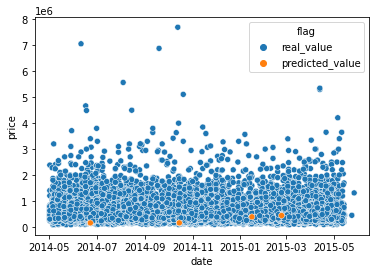

In [ ]:
sns.scatterplot(data = df_complet,
                x = "date", 
                y = "price",
                hue = "flag")

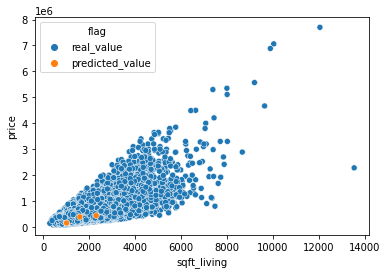

In [ ]:
sns.scatterplot(data = df_complet,
                x = "sqft_living", 
                y = "price",
                hue = "flag")

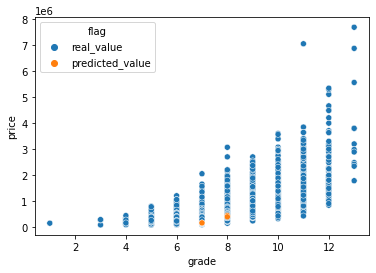

In [ ]:
sns.scatterplot(data = df_complet,
                x = "grade", 
                y = "price",
                hue = "flag")